In [1]:
# %load_ext autoreload
# %autoreload 2

# Experiments with EDLAE model

In [2]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.baseline.edlae import EDLAE

## Datasets

In [3]:
## Uncomment corresponding directory.
DATA_DIR = Path('../../data/ML20M/')
# DATA_DIR = Path('../../data/Amazon Video Games/')
# DATA_DIR = Path('../../data/Publiq/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [5]:
ALG = EDLAE

L2 = [10 ** p for p in range(2, 6)]
# L2 = [10, 50, 100, 200, 400]
RHO = [10, 100, 500, 1000]
MAX_ITER = 10
HYPERPARAMS = {'l2': L2, 'rho': RHO, 'max_iterations': MAX_ITER}
HYPERPARAMS

{'l2': [100, 1000, 10000, 100000],
 'rho': [10, 100, 500, 1000],
 'max_iterations': 10}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags
HYPERPARAMS['t'] = t
del S

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

## Perform gridsearch on validation set

In [7]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, None, Xval_in, Xval_out, HYPERPARAMS)

Training model EDLAE with hyperparameters {'l2': 100, 'rho': 10, 'max_iterations': 10, 't': 3504}


norm E 3.6979011135646367
norm D 1416.8029172908741
diag norm: 41.57478285291388
diag_diff: 41.57478285291388

norm E 3.4632484455724484
norm D 1448.9783331072547
diag norm: 46.24538607681218
diag_diff: 46.19568998545255
rho * change E: 15.926162387906713

norm E 3.4286048332428702
norm D 1454.4403182197439
diag norm: 46.46925573091112
diag_diff: 46.327295604926825
rho * change E: 4.7025362727613835

norm E 3.403417509147229
norm D 1456.3015302480558
diag norm: 46.26054412279093
diag_diff: 46.01658803306569
rho * change E: 2.4229116290581842

norm E 3.3805937170526037
norm D 1457.168469943361
diag norm: 45.94875577467117
diag_diff: 45.601272120472956
rho * change E: 1.5470150620528382

norm E 3.3589785668831795
norm D 1457.6560411091696
diag norm: 45.605260317581816
diag_diff: 45.15507402491583
rho * change E: 1.1268232532571294

norm E 3.338278127779323
norm D 1457.9687187680097
diag norm: 45.253387877355834
diag_diff: 44.70209846805555
rho * change E: 0.8966817972574446

norm E 3.318

norm E 1.9632737568990295
norm D 1676.2320056557269
diag norm: 27.803257941977
diag_diff: 27.803257941977

norm E 1.9623809136813724
norm D 1703.3555441883584
diag norm: 29.08781907497011
diag_diff: 29.051462853299423
rho * change E: 3.5744087644258062

norm E 1.9602525839763327
norm D 1707.6643857703716
diag norm: 29.11561112563565
diag_diff: 29.038319851659498
rho * change E: 0.9825066055530354

norm E 1.9571510657677453
norm D 1709.113408061756
diag norm: 29.079214855117183
diag_diff: 28.960261094242323
rho * change E: 0.501149655997595

norm E 1.953833867064297
norm D 1709.7731191870123
diag norm: 29.029112352375307
diag_diff: 28.868363749540844
rho * change E: 0.3172415693788624

norm E 1.950459765701371
norm D 1710.1292311776765
diag norm: 28.974559298531826
diag_diff: 28.772070862046945
rho * change E: 0.2262398031283252

norm E 1.9470750557386818
norm D 1710.344228899066
diag norm: 28.918266473670936
diag_diff: 28.674170733305214
rho * change E: 0.17415252469772402

norm E 1.94

norm E 0.6568684564984733
norm D 1771.744712801765
diag norm: 9.464349210770182
diag_diff: 9.464349210770182

norm E 0.6575629374440415
norm D 1796.411529429208
diag norm: 9.574116477477606
diag_diff: 9.570464857904268
rho * change E: 0.4243140489908143

norm E 0.6575105258210475
norm D 1800.3511911851958
diag norm: 9.576299707745216
diag_diff: 9.568855574159068
rho * change E: 0.11156665912601361

norm E 0.6573985016481997
norm D 1801.6848667458094
diag norm: 9.574938955009355
diag_diff: 9.563670118529433
rho * change E: 0.05655263074149363

norm E 0.657274289588677
norm D 1802.2934712405392
diag norm: 9.572849718798714
diag_diff: 9.557745022835258
rho * change E: 0.03567798955943297

norm E 0.6571462347833233
norm D 1802.6213568204244
diag norm: 9.570516017821047
diag_diff: 9.551571424407895
rho * change E: 0.025204045318110282

norm E 0.657016657530191
norm D 1802.8179090677938
diag norm: 9.568077686356082
diag_diff: 9.5452922425261
rho * change E: 0.019067536566281063

norm E 0.656

norm E 0.15428832368236559
norm D 1784.7235011102096
diag norm: 1.6610704414241086
diag_diff: 1.6610704414241086

norm E 0.15434091422287435
norm D 1809.1089467720267
diag norm: 1.6697603460242454
diag_diff: 1.6696733790638398
rho * change E: 0.043313045862798015

norm E 0.1543427578660221
norm D 1813.028376936644
diag norm: 1.6700238230601154
diag_diff: 1.669846608539733
rho * change E: 0.01135648143220296

norm E 0.15434164318144478
norm D 1814.3478568185367
diag norm: 1.6700453753238202
diag_diff: 1.6697770471563524
rho * change E: 0.0057443384216545115

norm E 0.15433992124779816
norm D 1814.9475729702326
diag norm: 1.6700172925857308
diag_diff: 1.6696575038635497
rho * change E: 0.003613124354286543

norm E 0.15433800221512753
norm D 1815.2702669054402
diag norm: 1.6699726406610893
diag_diff: 1.6695212189326198
rho * change E: 0.0025466277997416597

norm E 0.154336000750703
norm D 1815.4636042178881
diag norm: 1.6699208752042796
diag_diff: 1.6693777247928137
rho * change E: 0.0019

norm E 3.6973654456556693
norm D 1416.22536519303
diag norm: 41.572221842515305
diag_diff: 41.572221842515305

norm E 3.23376958485318
norm D 1451.391760622494
diag norm: 42.96728211164484
diag_diff: 41.46968075461764
rho * change E: 161.8033069078385

norm E 3.1091109841176823
norm D 1459.0815155565715
diag norm: 41.38292597539461
diag_diff: 38.34126649016667
rho * change E: 51.849029601862355

norm E 3.04028649155243
norm D 1462.7755564504837
diag norm: 40.03312958415611
diag_diff: 35.626266034333845
rho * change E: 31.43996476709694

norm E 2.991466150891432
norm D 1465.0014763966115
diag norm: 38.92578667300088
diag_diff: 33.304020407556266
rho * change E: 23.083498131294874

norm E 2.955299689033881
norm D 1466.44730908122
diag norm: 38.00769989096489
diag_diff: 31.246400342880122
rho * change E: 18.234405495825733

norm E 2.932286360624861
norm D 1467.464949145749
diag norm: 37.24522008346179
diag_diff: 29.35944541587885
rho * change E: 14.902868709667914

norm E 2.92486830545409

norm E 1.9642193042301392
norm D 1674.7829298836436
diag norm: 27.80118275323572
diag_diff: 27.745935600817557

norm E 1.9164525368727434
norm D 1701.985971417918
diag norm: 28.313791366363162
diag_diff: 27.687182260478075
rho * change E: 35.62901238639419

norm E 1.8982202544037976
norm D 1706.4884403539647
diag norm: 28.052174527803
diag_diff: 26.849226413097938
rho * change E: 9.86917431327883

norm E 1.8819891088428975
norm D 1708.2267204108778
diag norm: 27.772214305270154
diag_diff: 26.01533437367082
rho * change E: 5.6772353849461625

norm E 1.8668328478687182
norm D 1709.2222284908396
diag norm: 27.49984634007543
diag_diff: 25.21406985696518
rho * change E: 4.34193926173095

norm E 1.8526061723978529
norm D 1709.9393152068292
diag norm: 27.2397884958032
diag_diff: 24.449516600725605
rho * change E: 3.7477599665399883

norm E 1.8392367182014542
norm D 1710.5262539455741
diag norm: 26.99298323612503
diag_diff: 23.721181660631085
rho * change E: 3.395513131925753

norm E 1.8266741

norm E 0.6566498803871432
norm D 1773.3399406326728
diag norm: 9.46414811938938
diag_diff: 9.448240005251593

norm E 0.6551334273405836
norm D 1797.9918465984842
diag norm: 9.533110483563206
diag_diff: 9.468627249200578
rho * change E: 4.233713751669143

norm E 0.654555951357064
norm D 1801.9216788927158
diag norm: 9.523462343445207
diag_diff: 9.409910027958263
rho * change E: 1.111090892650012

norm E 0.6539595933976272
norm D 1803.2511726354062
diag norm: 9.510937678572725
diag_diff: 9.348509597112582
rho * change E: 0.5705980123713374

norm E 0.6533635474503139
norm D 1803.8609842374292
diag norm: 9.497890292718976
diag_diff: 9.286885968237838
rho * change E: 0.3731155876231269

norm E 0.6527715338855413
norm D 1804.1937139570277
diag norm: 9.484732628157003
diag_diff: 9.225482667783629
rho * change E: 0.279793980159281

norm E 0.6521844111875208
norm D 1804.3974482946862
diag norm: 9.471581858762042
diag_diff: 9.164428054208667
rho * change E: 0.22922261968774346

norm E 0.65160239

norm E 0.1537911794411413
norm D 1785.2443144371848
diag norm: 1.6610751770546754
diag_diff: 1.6608175557467761

norm E 0.15380089049899642
norm D 1809.5901355863775
diag norm: 1.6686492129376362
diag_diff: 1.6671161151871596
rho * change E: 0.43267604645390073

norm E 0.15379929180160382
norm D 1813.4929210746154
diag norm: 1.6687254638946931
diag_diff: 1.6659005247203313
rho * change E: 0.1131780257532334

norm E 0.1537953171740003
norm D 1814.8114999577244
diag norm: 1.6685746922747284
diag_diff: 1.6644550922786796
rho * change E: 0.05732517456222325

norm E 0.15379086907837852
norm D 1815.4100154577286
diag norm: 1.6683776395103902
diag_diff: 1.662962999256937
rho * change E: 0.03610849203887236

norm E 0.15378627865919473
norm D 1815.7308488605279
diag norm: 1.6681652949136225
diag_diff: 1.6614560400395344
rho * change E: 0.025461975003217185

norm E 0.1537816356750506
norm D 1815.922744731364
diag norm: 1.6679465474056017
diag_diff: 1.6599434460622822
rho * change E: 0.0192520175

norm E 3.698423086108749
norm D 1417.071098518312
diag norm: 41.57218043221016
diag_diff: 37.5801637052595

norm E 2.8883092996067528
norm D 1480.569650801797
diag norm: 37.488358520061055
diag_diff: 28.855826351570222
rho * change E: 979.851873101158

norm E 2.859023703676072
norm D 1492.15217210725
diag norm: 35.098761343445425
diag_diff: 23.199215957995364
rho * change E: 272.88456577013056

norm E 2.9114351645965155
norm D 1496.1350122712909
diag norm: 33.466375032694586
diag_diff: 19.261474295336825
rho * change E: 173.59864264673425

norm E 2.975192414430546
norm D 1498.0649534884717
diag norm: 32.29734608322454
diag_diff: 16.389652995247452
rho * change E: 128.20689844305917

norm E 3.0350310851946083
norm D 1499.177116552315
diag norm: 31.427778255654644
diag_diff: 14.207609077861568
rho * change E: 99.50360546956041

norm E 3.0875537059337197
norm D 1499.880560928406
diag norm: 30.761613825734976
diag_diff: 12.49280916109975
rho * change E: 79.77654872498145

norm E 3.13268819

norm E 1.9630323399763905
norm D 1676.932787445017
diag norm: 27.800097698092436
diag_diff: 26.015163568954044

norm E 1.8396807010435665
norm D 1708.6156004551303
diag norm: 27.06965993908589
diag_diff: 23.009835187031694
rho * change E: 193.36151005103153

norm E 1.798182172240066
norm D 1716.294223675559
diag norm: 26.28788110092609
diag_diff: 20.31267902763473
rho * change E: 61.58782444658332

norm E 1.7668349583157272
norm D 1719.8494243714995
diag norm: 25.63185027821881
diag_diff: 18.038219103836514
rho * change E: 41.98426912291235

norm E 1.7431252292588897
norm D 1721.7507937417643
diag norm: 25.079227830699192
diag_diff: 16.10544811545944
rho * change E: 32.476224289293974

norm E 1.7256184804818555
norm D 1722.9010054493572
diag norm: 24.60797744832198
diag_diff: 14.455801986381083
rho * change E: 26.60306894284745

norm E 1.7125072356992828
norm D 1723.6605900155937
diag norm: 24.199848061293824
diag_diff: 13.042008039865593
rho * change E: 22.82504867633987

norm E 1.702

norm E 0.6563699884919353
norm D 1771.7574274979079
diag norm: 9.464240617705014
diag_diff: 9.282231218122048

norm E 0.6511263067937575
norm D 1796.4832933571836
diag norm: 9.45780646279932
diag_diff: 9.034976893234361
rho * change E: 21.27990602337878

norm E 0.6490813545101983
norm D 1800.5522141526567
diag norm: 9.410671431256931
diag_diff: 8.752942534589035
rho * change E: 5.8794131098163565

norm E 0.6471725322043147
norm D 1802.0398817441353
diag norm: 9.363501259716976
diag_diff: 8.478630279480353
rho * change E: 3.622827177165862

norm E 0.6453540616369791
norm D 1802.8255552216651
diag norm: 9.317557894560816
diag_diff: 8.213276839645651
rho * change E: 2.942136821747213

norm E 0.6436172496886556
norm D 1803.350502972774
diag norm: 9.273051875883546
diag_diff: 7.956873930718994
rho * change E: 2.650810863897306

norm E 0.6419575023801074
norm D 1803.7598918373565
diag norm: 9.23001746210261
diag_diff: 7.709201683849958
rho * change E: 2.4838429842148204

norm E 0.64037106681

norm E 0.15339774274735032
norm D 1785.6133350408652
diag norm: 1.661060007833242
diag_diff: 1.6569568219403015

norm E 0.1533319772902668
norm D 1809.961001127583
diag norm: 1.6664306087675158
diag_diff: 1.655459832249977
rho * change E: 2.160789988680803

norm E 0.15333166840316112
norm D 1813.8432632774736
diag norm: 1.6660777746816415
diag_diff: 1.6482166203916906
rho * change E: 0.5636669974107624

norm E 0.15333010330992994
norm D 1815.1605993092196
diag norm: 1.6655259874450086
diag_diff: 1.6407959838657908
rho * change E: 0.28694502019049756

norm E 0.15332832114545375
norm D 1815.7662173382148
diag norm: 1.6649359572373825
diag_diff: 1.6333647370658566
rho * change E: 0.18399213766389505

norm E 0.1533265110868389
norm D 1816.0952188877163
diag norm: 1.664335214117479
diag_diff: 1.6259522422055035
rho * change E: 0.13356143994273234

norm E 0.15332471731721534
norm D 1816.29427253374
diag norm: 1.6637315833357402
diag_diff: 1.6185670067653688
rho * change E: 0.1049933267053517

norm E 3.69716343696335
norm D 1417.7885603496225
diag norm: 41.56509311530074
diag_diff: 33.669125730758196

norm E 2.88112704830268
norm D 1486.0633120779823
diag norm: 35.96244049476855
diag_diff: 22.831350642946536
rho * change E: 2094.9142823015195

norm E 2.9293311675691625
norm D 1497.453648483904
diag norm: 33.13232386526043
diag_diff: 16.74197961442127
rho * change E: 619.5097340102639

norm E 3.0284211664012006
norm D 1501.298771628257
diag norm: 31.420201451602715
diag_diff: 12.89925613842417
rho * change E: 375.2153662579347

norm E 3.116485314234302
norm D 1503.1122917803334
diag norm: 30.319328888364662
diag_diff: 10.304196082874368
rho * change E: 258.2982530791322

norm E 3.1866920244255885
norm D 1504.1143230561172
diag norm: 29.579661999439917
diag_diff: 8.453119450371043
rho * change E: 188.54316508773013

norm E 3.2414223280152576
norm D 1504.725976201594
diag norm: 29.065622896489415
diag_diff: 7.073832114118037
rho * change E: 143.48158655805622

norm E 3.28419879

norm E 1.9637823803366068
norm D 1676.688535970787
diag norm: 27.80225326745368
diag_diff: 24.19732460803977

norm E 1.809133944711031
norm D 1717.3142399063436
diag norm: 26.505889403630743
diag_diff: 19.55888465289418
rho * change E: 418.5943512717475

norm E 1.7595645010301944
norm D 1726.1231027656765
diag norm: 25.429082067882767
diag_diff: 15.945855833635727
rho * change E: 140.2698936614069

norm E 1.7287057197686546
norm D 1729.3333460509461
diag norm: 24.590365102454673
diag_diff: 13.170251954618289
rho * change E: 95.81000438923783

norm E 1.708742018861975
norm D 1730.8909133326868
diag norm: 23.923007459134233
diag_diff: 11.01330749269561
rho * change E: 74.8667770527295

norm E 1.6949558087630245
norm D 1731.7822323841262
diag norm: 23.385011998960774
diag_diff: 9.314845735733421
rho * change E: 60.82530538486464

norm E 1.6849965012381303
norm D 1732.356286637292
diag norm: 22.94775156812654
diag_diff: 7.95948783164591
rho * change E: 50.204110216520014

norm E 1.67760263

norm E 0.6562292528841421
norm D 1771.0967951423181
diag norm: 9.464403798981369
diag_diff: 9.06551491720625

norm E 0.6484992663037776
norm D 1795.853576437473
diag norm: 9.401690770204919
diag_diff: 8.555645842229605
rho * change E: 43.549493698694995

norm E 0.6451215303869621
norm D 1800.2510883832163
diag norm: 9.317380045735405
diag_diff: 8.050339550233842
rho * change E: 13.573793676524184

norm E 0.642089843537526
norm D 1802.1152930899475
diag norm: 9.23742604654003
diag_diff: 7.57609830813841
rho * change E: 9.856438258469684

norm E 0.6393194211112895
norm D 1803.2918354271055
diag norm: 9.16230899424488
diag_diff: 7.131841547335807
rho * change E: 8.623975773673115

norm E 0.6367819639543536
norm D 1804.197083733908
diag norm: 9.09188907065121
diag_diff: 6.715750265208056
rho * change E: 7.900695612511213

norm E 0.6344576806059934
norm D 1804.9540403712294
diag norm: 9.025926357363232
diag_diff: 6.325969883939878
rho * change E: 7.329741624891248

norm E 0.6323298156373222

norm E 0.15474550997707245
norm D 1783.8801237729333
diag norm: 1.6610735328389488
diag_diff: 1.6509550459897488

norm E 0.15464289944366869
norm D 1808.2693864482592
diag norm: 1.6649681508480136
diag_diff: 1.6410554880339479
rho * change E: 4.3146265071933145

norm E 0.15465021168628623
norm D 1812.183099635453
diag norm: 1.664193760376647
diag_diff: 1.6265233753474462
rho * change E: 1.1272728236501055

norm E 0.15465723572985945
norm D 1813.5117084949636
diag norm: 1.6632483077372888
diag_diff: 1.6119296408134562
rho * change E: 0.5815960554969675

norm E 0.15466422788789802
norm D 1814.1226159926514
diag norm: 1.662275072102228
diag_diff: 1.597426187292483
rho * change E: 0.38382117665582516

norm E 0.15467125286554814
norm D 1814.4569407477927
diag norm: 1.6612990391612448
diag_diff: 1.583039850582613
rho * change E: 0.2912368409766177

norm E 0.15467831749241434
norm D 1814.6629032696815
diag norm: 1.6603272622421112
diag_diff: 1.5687777962143916
rho * change E: 0.24174441239040

In [8]:
f"Best score of {score} achieved with {best_hyperparams}."

"Best score of 0.41181516630576936 achieved with {'l2': 10000, 'rho': 1000, 'max_iterations': 10, 't': 3504}."

## Evaluate model with optimal hyperparams on test set

In [9]:
%%time
alg = ALG(**best_hyperparams)
alg.fit(X)

norm E 0.6568480690095512
norm D 1771.4937321761493
diag norm: 9.464207992668804
diag_diff: 9.065327136850932

norm E 0.6491230452635713
norm D 1796.2678433465037
diag norm: 9.401664556559698
diag_diff: 8.555664504662934
rho * change E: 43.574540855125036

norm E 0.6457470073843674
norm D 1800.6762726085267
diag norm: 9.31733957482714
diag_diff: 8.050352285990948
rho * change E: 13.572318548311914

norm E 0.6427180997099695
norm D 1802.5541539617996
diag norm: 9.237379087250352
diag_diff: 7.576108933527558
rho * change E: 9.859142452209477

norm E 0.6399502454908707
norm D 1803.7388485917538
diag norm: 9.162259796101829
diag_diff: 7.131850507202455
rho * change E: 8.625433213935546

norm E 0.6374151174459021
norm D 1804.6472040994827
diag norm: 9.091840894400269
diag_diff: 6.715757145963277
rho * change E: 7.899330939113411

norm E 0.6350929310971456
norm D 1805.4040623001645
diag norm: 9.025881871741193
diag_diff: 6.325977239002289
rho * change E: 7.325991510455857

norm E 0.632966800

In [10]:
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set
Evaluating with 10000 users
Average Recall@20 0.384
Average Recall@100 0.627
Average nDCG@100 0.409


## Plot amount of items from long tail recommended

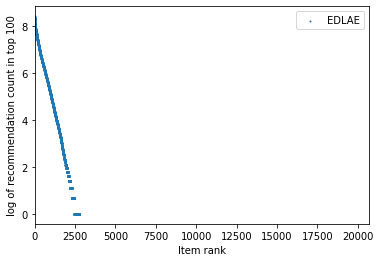

In [11]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["EDLAE"], k=100)